In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [80]:
#Loading the dataset
#I am using a new dataset from kaggle for heart disease
diabetes_data = pd.read_csv('.\heart.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
## observing the shape of the data
diabetes_data.shape

(303, 14)

In [82]:
X = diabetes_data.drop("target",axis = 1)
y = diabetes_data.target

In [83]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [84]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=42, stratify=y)

In [85]:
X_train.shape

(227, 13)

In [86]:
X_test.shape

(76, 13)

In [87]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

# LOGISTIC REGRESSION

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.5).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.863
Test set score: 0.763


In [89]:
logreg.intercept_.T

array([0.13110554])

In [90]:
logreg.coef_.T

array([[-0.04609546],
       [-0.64511487],
       [ 0.9516599 ],
       [-0.09890319],
       [-0.42841771],
       [-0.01846608],
       [ 0.18764989],
       [ 0.54961141],
       [-0.51396038],
       [-0.60205409],
       [ 0.3265463 ],
       [-0.47021976],
       [-0.56682164]])

### Confusion Matrix

In [91]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[23 12]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.74      0.85      0.80        41

    accuracy                           0.76        76
   macro avg       0.77      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



### ROC

Accuracy= 0.7631578947368421


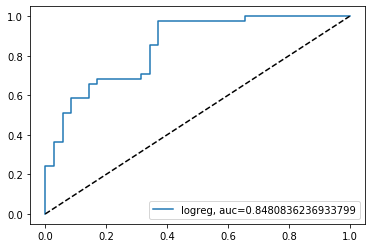

In [92]:
from sklearn import metrics


print("Accuracy=", metrics.accuracy_score(y_test, y_pred))
 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

### Gains / Lift Chart

In [93]:

#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

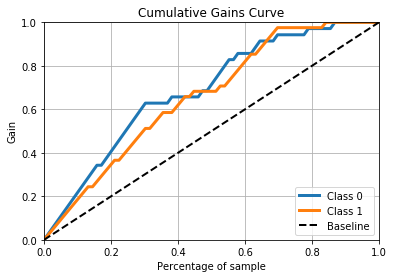

In [94]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

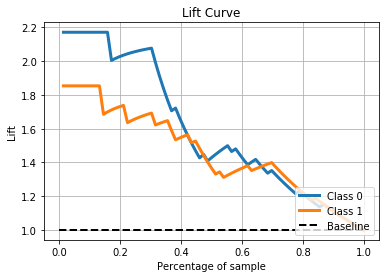

In [95]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()

# K-NN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [97]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [98]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 82.89473684210526 % and k = [11, 12]


### K-NN Result Visualisation

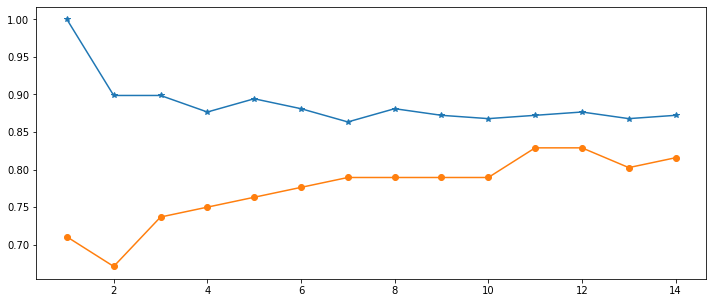

In [99]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

This one compares...

#### The best result is captured at k = 11 hence 11 is used for the final model

In [100]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8289473684210527

## Model Performance Analysis

In [101]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,25,10,35
1,3,38,41
All,28,48,76


In [102]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        35
           1       0.79      0.93      0.85        41

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.82        76
weighted avg       0.84      0.83      0.83        76



In [103]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

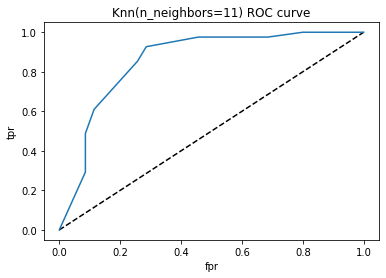

In [104]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [105]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8571428571428571

In [106]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8590308370044053
Best Parameters: {'n_neighbors': 10}


# Naiive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [108]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

In [109]:
# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [111]:
mod.score(X_test,y_test)

0.7763157894736842

In [112]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[24 11]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.76      0.85      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



In [113]:
# You can compare the performance of multiple models in one ROC chart. Wrtie your own codes in the cells below.

Accuracy= 0.7763157894736842


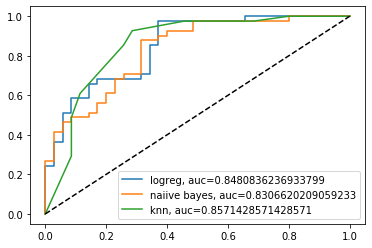

In [114]:
from sklearn import metrics

#logreg 
print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="logreg, auc="+str(auc))

#Naiive Bayes
y_pred_proba_nb = mod.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, y_pred_proba_nb)
auc_nb = metrics.roc_auc_score(y_test, y_pred_proba_nb)
plt.plot(fpr_nb,tpr_nb,label="naiive bayes, auc="+str(auc_nb))

#knn
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_pred_proba_knn)
auc_knn = metrics.roc_auc_score(y_test, y_pred_proba_knn)
plt.plot(fpr_knn,tpr_knn,label="knn, auc="+str(auc_knn))

plt.plot()
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [115]:
#This chart for heart disease is not as smooth as diabetes, this is due to the smaller dataset.